<a href="https://colab.research.google.com/github/fayzulloo/RSA-encryption-and-decryption-system/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=7165ac865bbddc9e9fb5a3b96e574cf154ce6ea2a8cc9cbd0b3cde3a704fca9f
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [26]:
import os
import random
import face_recognition
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

In [6]:
# Specify the path to the main folder containing the four subfolders
main_folder_path = "/content/drive/MyDrive/Diplom_ishi/Data/train"

In [16]:
subfolders = [f.name for f in os.scandir(main_folder_path) if f.is_dir()]

for subfolder in subfolders:
    print(subfolder, end=", ")

Abdulhaq, Fayzullo, Ixtiyor, Murod, 

In [11]:
# List the names of the four subfolders (person names)
person_names = ["Fayzullo", "Abdulxaq", "Ixtiyor", "Murod"]


Images in Fayzullo folder:




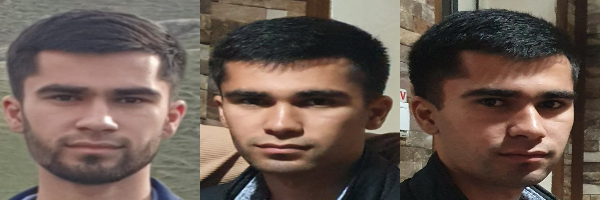


Images in Abdulhaq folder:




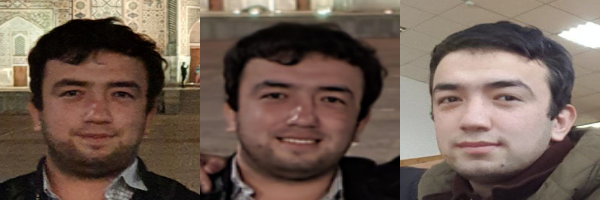


Images in Ixtiyor folder:




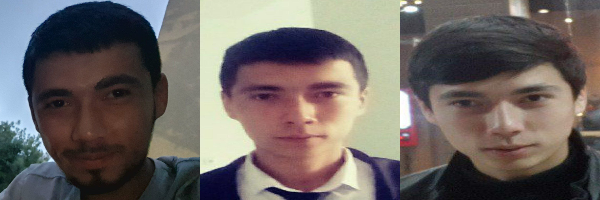


Images in Murod folder:




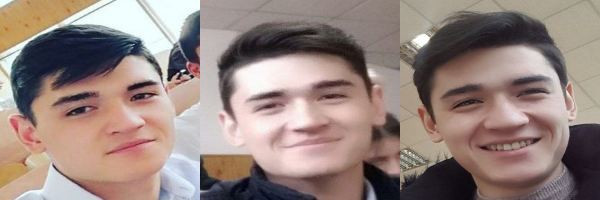

In [27]:
# Set the size of the displayed images
display_width = 200  # Width of each displayed image
display_height = 200  # Height of each displayed image

# Loop through each person's subfolder
for person_name in person_names:
    subfolder_path = os.path.join(main_folder_path, person_name)
    if os.path.isdir(subfolder_path):
        print(f"\nImages in {person_name} folder:")
        # List all image files within the subfolder
        image_files = [f for f in os.listdir(subfolder_path) if f.endswith(".jpg") or f.endswith(".png")]
        
        # Randomly select an image file from the subfolder
        if image_files:
            # Create a new line for each person's subfolder
            print("\n")
            
            # Display images side by side within the subfolder
            images_row = []
            for image_file in image_files:
                image_path = os.path.join(subfolder_path, image_file)
                
                # Load and resize the image
                image = cv2.imread(image_path)
                image = cv2.resize(image, (display_width, display_height))
                
                # Append image to the row
                images_row.append(image)
            
            # Display the images side by side
            stacked_images = np.hstack(images_row)
            cv2_imshow(stacked_images)

In [ ]:
# Load the known face encodings and names from the subfolders
known_face_encodings = []
known_face_names = []

In [ ]:
for person_name in person_names:
    subfolder_path = os.path.join(main_folder_path, person_name)
    
    # Get the list of image files in the subfolder
    image_files = os.listdir(subfolder_path)
    
    for image_file in image_files:
        file_path = os.path.join(subfolder_path, image_file)
        image = face_recognition.load_image_file(file_path)
        face_encoding = face_recognition.face_encodings(image)[0]
        
        known_face_encodings.append(face_encoding)
        known_face_names.append(person_name)

In [ ]:
# Specify the path to the folder containing the test images
test_images_folder_path = "/content/drive/MyDrive/Diplom_ishi/Data/not_processed_images"

# Get a list of test image paths
test_image_paths = []
for test_image_file in os.listdir(test_images_folder_path):
    test_image_paths.append(os.path.join(test_images_folder_path, test_image_file))

In [44]:
# Randomly select 4 test image paths
random_test_image_paths = random.sample(test_image_paths, 4)

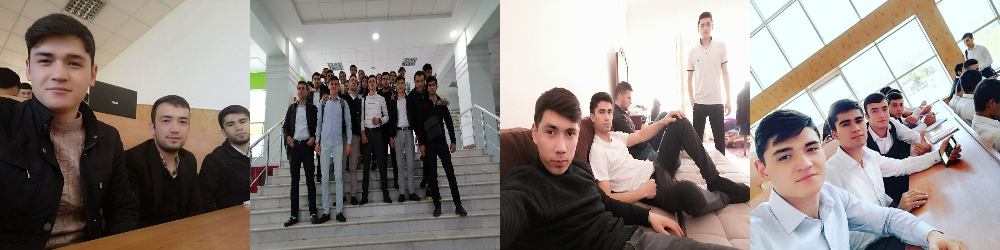

In [37]:
# Set the size of the displayed images
display_width = 250  # Width of each displayed image
display_height = 250  # Height of each displayed image

# Load and resize the randomly selected test images
resized_images = []
for image_path in random_test_image_paths:
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image
    resized_image = cv2.resize(image, (display_width, display_height))
    resized_images.append(resized_image)

# Concatenate the resized images side by side
combined_image = np.hstack(resized_images)

# Display the combined image
cv2_imshow(combined_image)

In [39]:
# Specify the desired width for the displayed image
display_width = 800

In [ ]:
# Randomly select 4 test image paths
random_test_image_paths = random.sample(test_image_paths, 4)

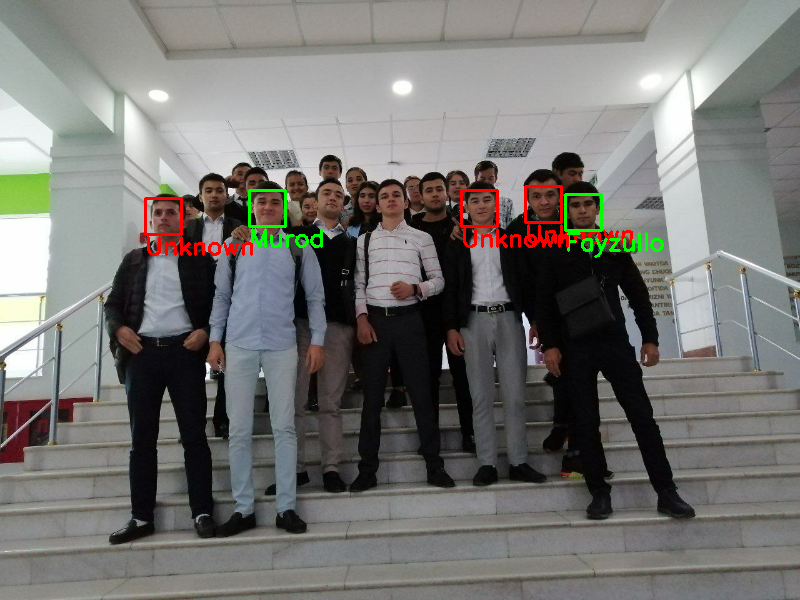

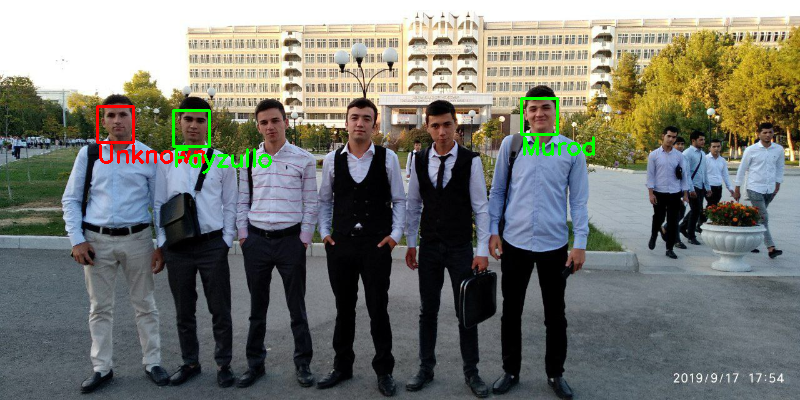

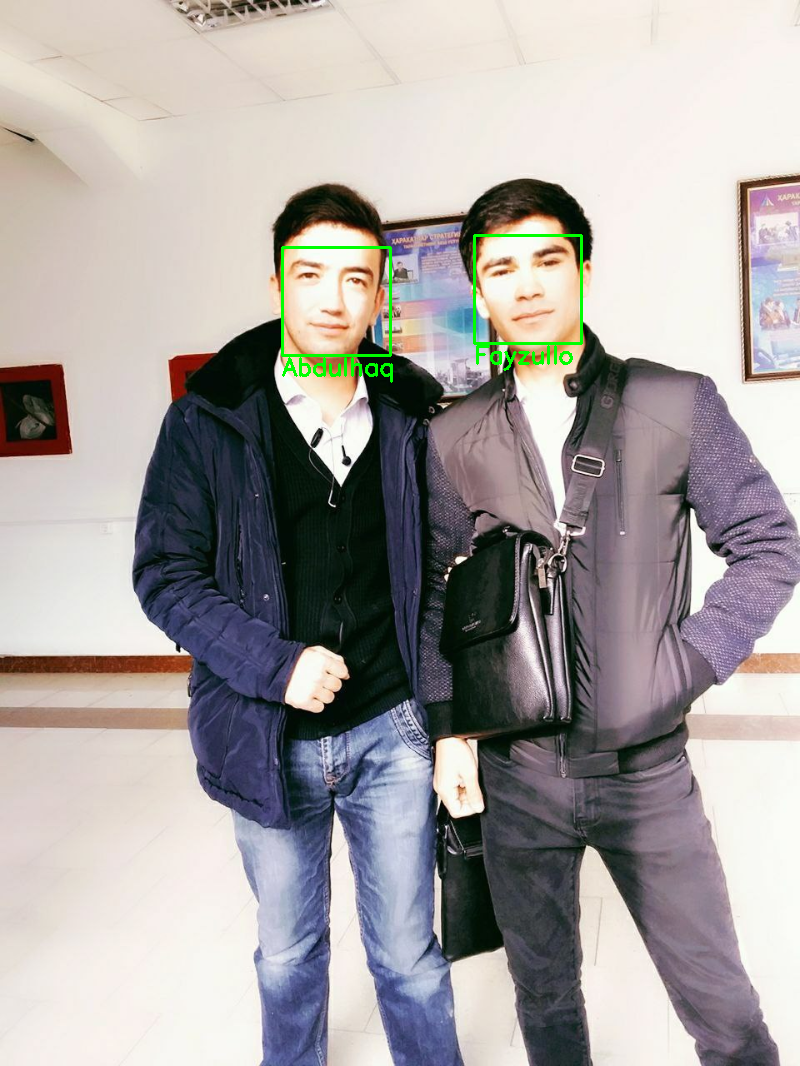

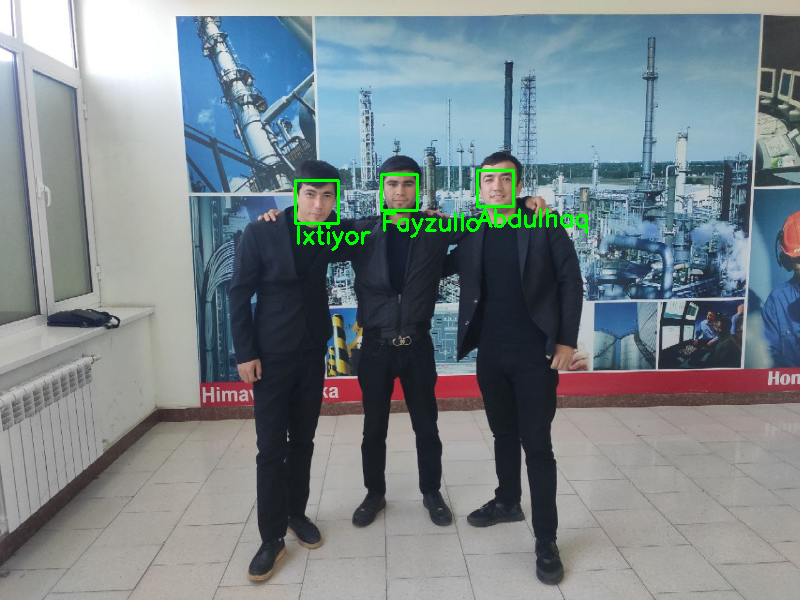

In [46]:
for test_image_path in random_test_image_paths:
    # Load the test image
    test_image = cv2.imread(test_image_path)
    
    # Resize the test image while preserving the aspect ratio
    height, width, _ = test_image.shape
    display_height = int(display_width * height / width)
    resized_image = cv2.resize(test_image, (display_width, display_height))
    
    # Convert the resized image from BGR to RGB
    rgb_resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    
    # Detect faces in the resized image
    face_locations = face_recognition.face_locations(rgb_resized_image)
    face_encodings = face_recognition.face_encodings(rgb_resized_image, face_locations)
    
    for face_encoding, face_location in zip(face_encodings, face_locations):
        # Compare the face encoding with the known face encodings
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        
        if any(face_distances <= 0.5):
            # At least one match found
            min_distance_index = face_distances.argmin()
            person_name = known_face_names[min_distance_index]
            
            # Draw a rectangle around the face in the resized image
            top, right, bottom, left = face_location
            cv2.rectangle(resized_image, (left, top), (right, bottom), (0, 255, 0), 2)
            
            # Write the person name under the face
            cv2.putText(resized_image, person_name, (left, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        else:
            # No match found, label as "Unknown"
            top, right, bottom, left = face_location
            cv2.rectangle(resized_image, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(resized_image, "Unknown", (left, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Display the resized image with framed familiar and unknown faces
    cv2_imshow(resized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()